# Activities

## Get data

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Import necessary libraries and packages

import pandas as pd
from data import Bellabeat
from activities import Activities

In [4]:
# bb = Bellabeat()
ac = Activities()
# activities_df = ac.get_activities_data()
# activities_df.head()

In [5]:
activities_df = ac.clean_data()

Initial information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    in

In [6]:
import matplotlib.pyplot as plt

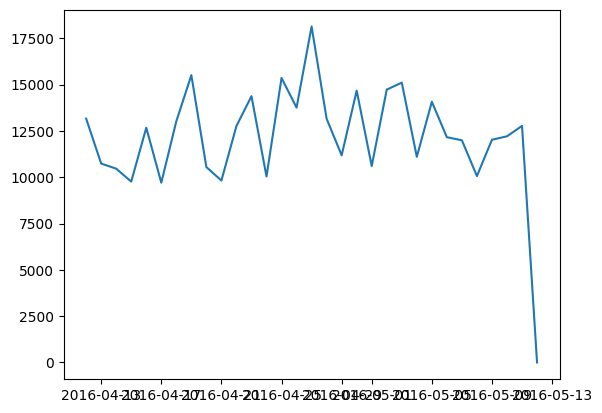

In [7]:
id_1 = activities_df[activities_df["Id"] == 1503960366]
plt.plot(id_1["ActivityDate"], id_1["TotalSteps"])
plt.show()

In [8]:
import seaborn as sns

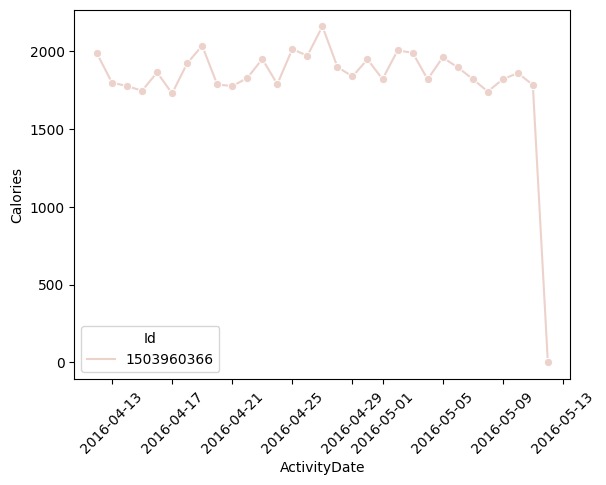

In [10]:
plt.figure()
sns.lineplot(data=id_1, x="ActivityDate", y="Calories", hue="Id", marker="o")
plt.xticks(rotation=45)
plt.legend(title="Id")
plt.show()